In [7]:
#OBJECTIVE: To analyse the past data of loans to figure out the risks involved in lending the new loans so that bad loans can be avoided.

In [8]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [9]:
#importing the abvailable .csv file

In [10]:
loan = pd.read_csv('loan.csv')

C:\Users\rahul\AppData\Local\Temp\ipykernel_12964\1890675884.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


In [11]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
#we need to clean this data for NaNs, single value columns and the columns which are of no use from analysis point of view.
#checking NaNs 

In [13]:
loan.shape

(39717, 111)

In [14]:
#we have 39717 rows and 111 columns

In [15]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [16]:
#dropping the NaNs in rows

loan.dropna( how='all' ,inplace=True)



In [17]:
loan.shape

(39717, 111)

<Axes: ylabel='Frequency'>

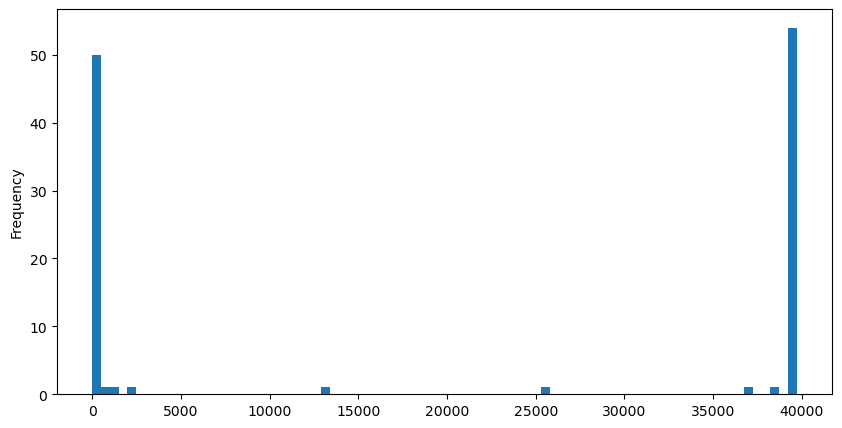

In [18]:
#we have all NaNs in columns. Plotting the NaNs columns in a histogram

nulls = loan.isna().sum()

nulls.plot(kind='hist', bins=80, figsize = (10,5))

In [19]:
#we can see meny NaNs are there beyond 2000, lets drop them

loan.drop(columns=list(nulls[nulls.values > 2000].index), inplace=True)
loan.shape

(39717, 52)

In [20]:
loan.shape

(39717, 52)

In [21]:
#We have dropped 58 columns with NaNs. Now checking columns for unique or single elements which are of no use in analysis.

cu = loan.nunique()

In [22]:
cu

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                     

In [23]:
#Many columns are observed with single element. Dropping such columns

c1 = cu[cu.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [24]:
loan.drop(columns = list(c1.index), inplace=True)
loan.shape

(39717, 43)

In [25]:
#we have dropped another 9 columns with single values. Now checking for the columns which will not contrbute towards the analysis because of being distict nature like name and ID.
#we are also not interested in columns have data of approved loan accounts.
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan.drop(columns=del_cols, inplace=True)
loan.shape


(39717, 27)

In [26]:
#We have dropped another 16 columns. Now checking the left over values in the dataframe.

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

In [27]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


In [28]:
#lets prepare the data for analysis. Checking relevet columns from analysis relevence point of view.

loan['loan_status'].value_counts()


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [29]:
#Current loan is already running and cannot controute to analysis.

loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

(38577, 27)

In [30]:
loan['loan_amnt'].value_counts()

loan_amnt
10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: count, Length: 870, dtype: int64

In [31]:
loan['funded_amnt'].value_counts()

funded_amnt
10000    2719
12000    2161
5000     2017
6000     1876
15000    1732
         ... 
1650        1
30100       1
19675       1
21275       1
22350       1
Name: count, Length: 1019, dtype: int64

In [32]:
#there is a difference in loan amount and funded amount

loan['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [33]:
# customers opting for 60 months are almost 60% less.

loan['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [36]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [38]:
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<Axes: >

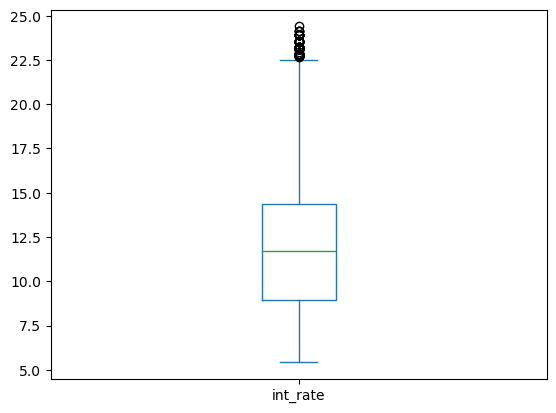

In [39]:
# we see some very high valuse so checking for outliares

loan['int_rate'].plot.box()

In [41]:
#we can clearly see outliares.

loan['emp_length'].isnull().sum()

1033

In [42]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [45]:
loan['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [47]:
loan['sub_grade'].value_counts().head()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
Name: count, dtype: int64

In [50]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [52]:
print(loan['title'].value_counts().head())
print(loan['title'].unique().shape)

title
Debt Consolidation         2090
Debt Consolidation Loan    1620
Personal Loan               641
Consolidation               491
debt consolidation          478
Name: count, dtype: int64
(19298,)


In [53]:
loan['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

In [54]:
loan['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [55]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [71]:
loan['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [72]:
len(loan['title'].value_counts())

19297

In [73]:
loan['title'].head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
Name: title, dtype: object

In [74]:
#since title column has too many unique values... let us drop this column as it may not be useful to keep it

loan.drop(columns=['title'], inplace=True)

In [75]:
loan['addr_state'].value_counts()

addr_state
CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [76]:
loan['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: count, Length: 524, dtype: int64

In [81]:
from datetime import datetime
today = datetime.today()
today.year

2024

In [82]:
def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
days_from_earliest_cr_line("JAN-24")

15

In [83]:
loan['days_from_earliest_cr_line'] = loan['earliest_cr_line'].apply(days_from_earliest_cr_line)
loan['days_from_earliest_cr_line'].describe()

count    38577.000000
mean      9841.981647
std       2491.854695
min       5554.000000
25%       8172.000000
50%       9391.000000
75%      11003.000000
max      28504.000000
Name: days_from_earliest_cr_line, dtype: float64

In [84]:
loan.drop(columns=['earliest_cr_line'], inplace=True)

In [85]:
loan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [86]:
loan['revol_util'] = pd.Series(loan['revol_util']).str.replace('%', '').astype(float)
loan['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [87]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  float64
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_length                  37544 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  issue_d                     38577 non-null  object 
 13  loan_status                 38577 no

In [88]:
#checking pecentage of loan paid against charged off

loan_status_percent = loan['loan_status'].value_counts(normalize=True)
loan_status_percent

loan_status
Fully Paid     0.854136
Charged Off    0.145864
Name: proportion, dtype: float64

In [89]:
#proceeding for univariate analysis: checking for high correlation values

loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)



In [90]:
loan.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
pub_rec_bankruptcies          float64
days_from_earliest_cr_line      int64
loan_status_

In [91]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,days_from_earliest_cr_line,loan_status_num
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0,1,3,0,13648,83.7,9,0.0,14259,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,0,5,3,0,1687,9.4,4,0.0,9056,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0,2,2,0,2956,98.5,10,0.0,8111,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0,1,10,0,5598,21.0,37,0.0,10211,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,0,3,9,0,7963,28.3,12,0.0,7015,0


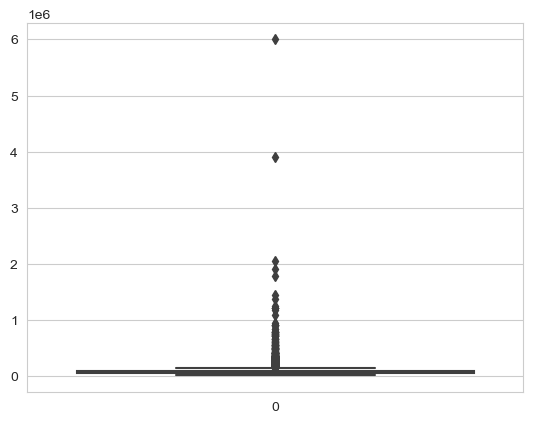

In [94]:
#checking for outliares 

sns.boxplot(loan['annual_inc'])
plt.show()

In [96]:
quantile_anls = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_anls

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [97]:
#"annual income" after quantile 95 and beyond looks disconnect from rest of the data distribution

In [99]:
quan_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= quan_95_annual_inc]

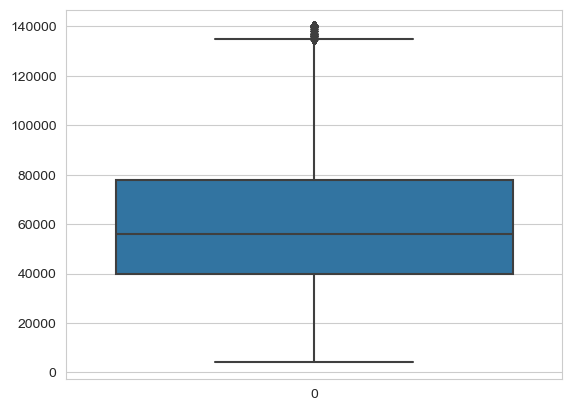

In [101]:
sns.boxplot(loan.annual_inc)
plt.show()

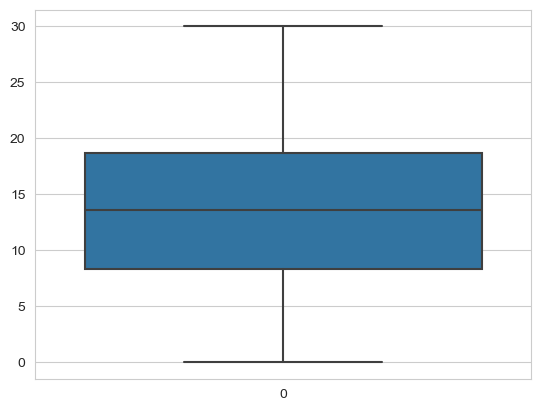

In [102]:
sns.boxplot(loan.dti)
plt.show()

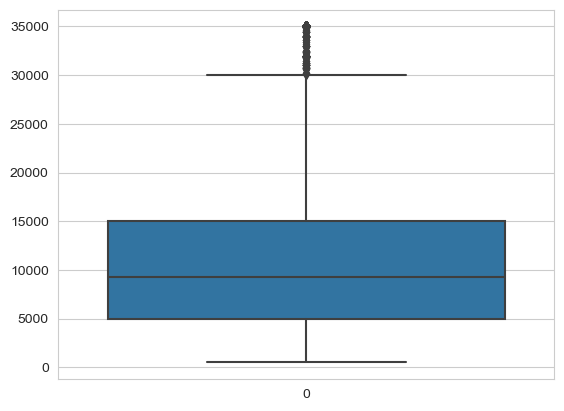

In [103]:
sns.boxplot(loan.loan_amnt)
plt.show()

In [104]:
loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

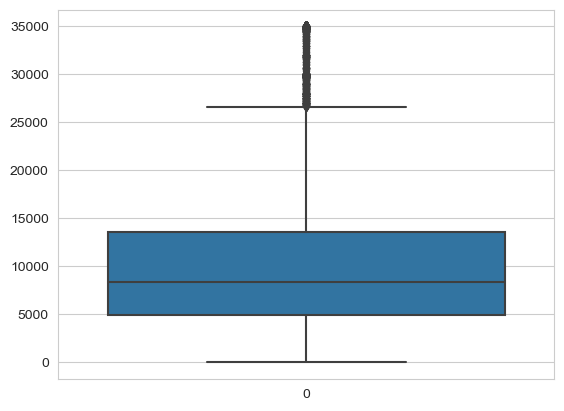

In [105]:
sns.boxplot(loan.funded_amnt_inv)
plt.show()

In [106]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8375.000000
0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.985    29925.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

In [110]:
#looking at the distribution it seems no outliares are there.

In [111]:
#categorical data visualization

colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']

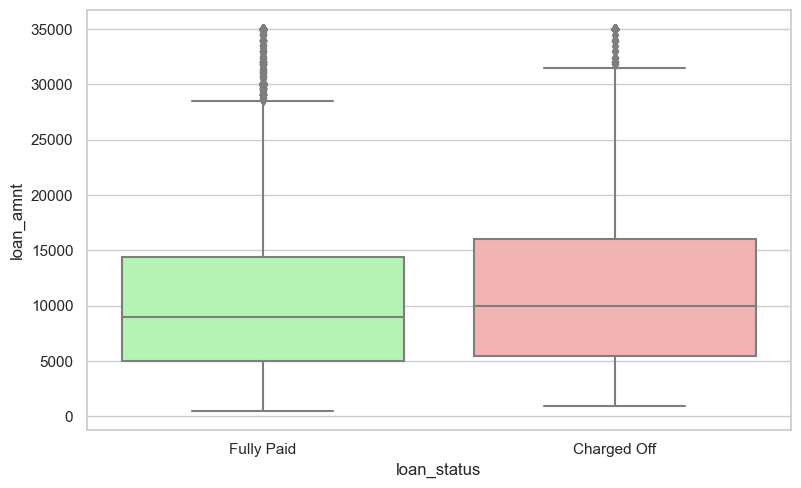

In [112]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)
plt.show()

In [113]:
loan['loan_amnt'].describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [114]:
#since we see there is huge difference between mean and median . let us limit our data to 75%

loan_till75 = loan.loc[(loan['loan_amnt']<=15000)]

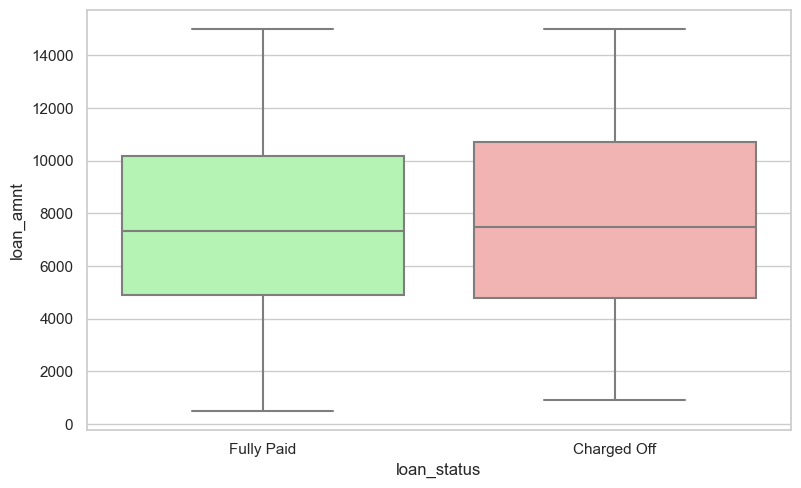

In [115]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

In [116]:
loan_above75 = loan.loc[(loan['loan_amnt']>=15000)]
loan_above75.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,days_from_earliest_cr_line,loan_status_num
20,20250,20250,19142.16108,60 months,15.27,484.63,C,C4,3 years,RENT,...,0,3,8,0,17813,85.6,22,0.0,9572,0
21,21000,21000,21000.00000,36 months,12.42,701.73,B,B4,10+ years,RENT,...,0,0,7,0,32135,90.3,38,0.0,14959,1
25,15000,15000,15000.00000,36 months,9.91,483.38,B,B1,2 years,MORTGAGE,...,0,0,8,0,13707,93.9,31,0.0,8019,0
26,15000,15000,8725.00000,36 months,14.27,514.64,C,C2,9 years,RENT,...,0,1,7,0,5872,57.6,11,0.0,7412,1
31,31825,31825,31825.00000,36 months,7.90,995.82,A,A4,5 years,MORTGAGE,...,0,0,12,0,23151,27.4,26,0.0,15416,0


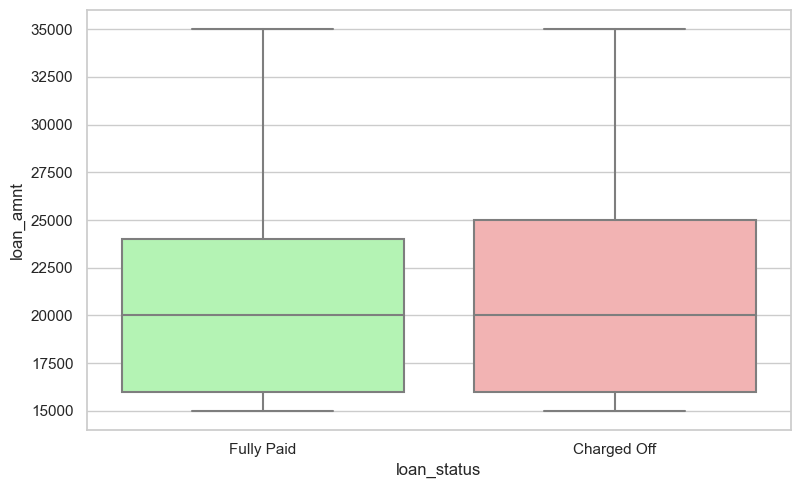

In [117]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.show()

In [118]:
#figure above represents that higher amount is more likely to be charged off.

In [119]:
#since we have too many columns for univariate analysis let us define some default functions, so that we can re-use same function
#for all the columns

def PercentileCut (*, data=loan, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'loan'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [120]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'days_from_earliest_cr_line',
       'loan_status_num'],
      dtype='object')

In [121]:
def Univariate_Categorical (*, data=loan, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : need to provide the numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = loan.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = loan.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()

C:\Users\rahul\AppData\Local\Temp\ipykernel_12964\2604333251.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = pd.qcut(data[column], q=5, labels=labels)


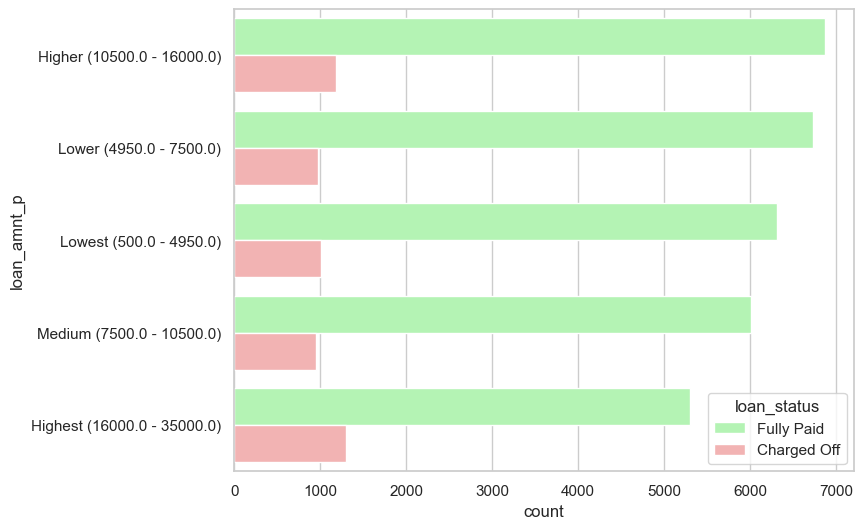

loan_amnt_p,Charged off %,Record count
Highest (16000.0 - 35000.0),0.196485,6601
Higher (10500.0 - 16000.0),0.146602,8049
Lowest (500.0 - 4950.0),0.138298,7332
Medium (7500.0 - 10500.0),0.137114,6965
Lower (4950.0 - 7500.0),0.126119,7707


In [122]:
PercentileCut(column='loan_amnt')
Univariate_Categorical(column='loan_amnt_p')

In [123]:
#amount of loan is directly proportional to defaults

C:\Users\rahul\AppData\Local\Temp\ipykernel_12964\2604333251.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = pd.qcut(data[column], q=5, labels=labels)


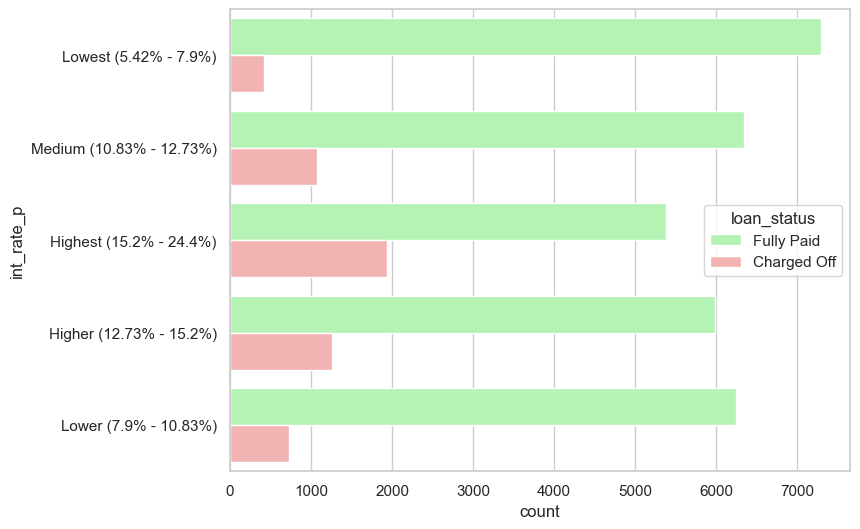

int_rate_p,Charged off %,Record count
Highest (15.2% - 24.4%),0.265083,7326
Higher (12.73% - 15.2%),0.173457,7241
Medium (10.83% - 12.73%),0.144687,7416
Lower (7.9% - 10.83%),0.103993,6962
Lowest (5.42% - 7.9%),0.054871,7709


In [124]:
PercentileCut(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_p')

In [127]:
#higher interest higher chance of loan default

C:\Users\rahul\AppData\Local\Temp\ipykernel_12964\2604333251.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = pd.qcut(data[column], q=5, labels=labels)


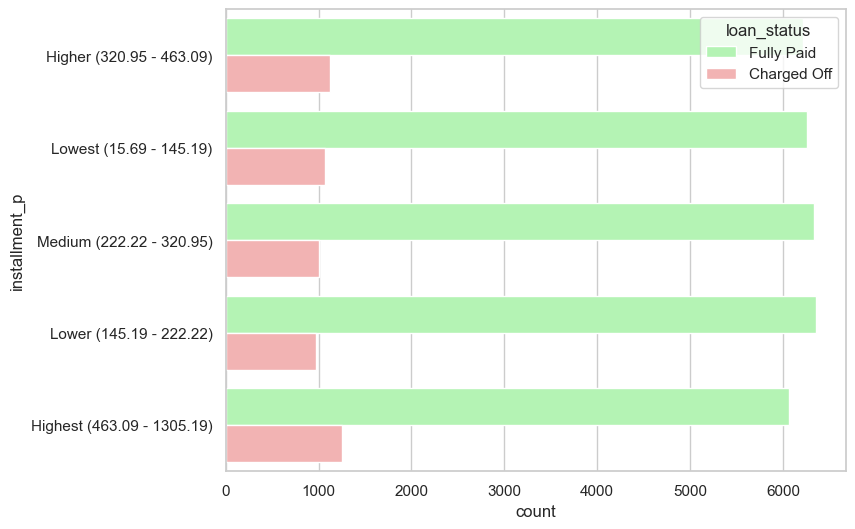

installment_p,Charged off %,Record count
Highest (463.09 - 1305.19),0.171311,7320
Higher (320.95 - 463.09),0.152568,7341
Lowest (15.69 - 145.19),0.146052,7333
Medium (222.22 - 320.95),0.136543,7331
Lower (145.19 - 222.22),0.132624,7329


In [128]:
PercentileCut(column='installment')
Univariate_Categorical(column='installment_p')

In [129]:
#higher instalment amount shows higher chances of defaults

C:\Users\rahul\AppData\Local\Temp\ipykernel_12964\2604333251.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = pd.qcut(data[column], q=5, labels=labels)


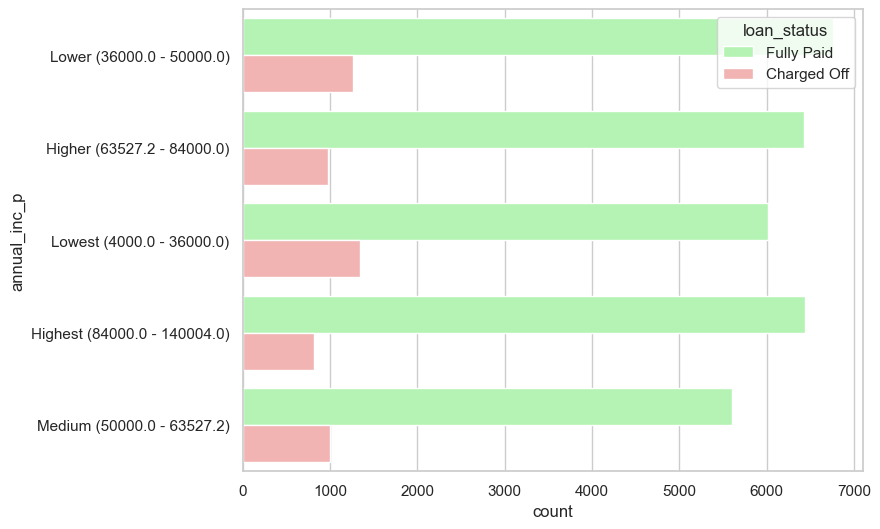

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 36000.0),0.182967,7362
Lower (36000.0 - 50000.0),0.157718,8027
Medium (50000.0 - 63527.2),0.151749,6603
Higher (63527.2 - 84000.0),0.132730,7406
Highest (84000.0 - 140004.0),0.113010,7256


In [130]:
PercentileCut(column='annual_inc')
Univariate_Categorical(column='annual_inc_p')

In [131]:
#higher annual income insures higher chances of loan repayment

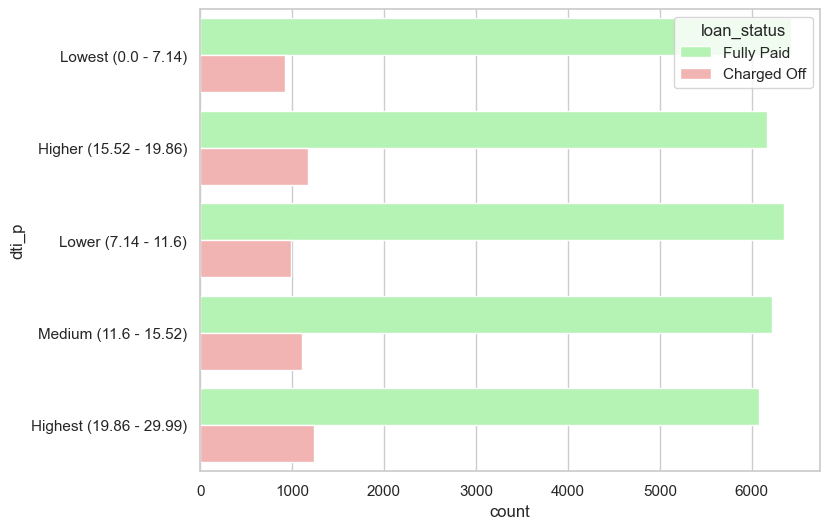

dti_p,Charged off %,Record count
Highest (19.86 - 29.99),0.168831,7315
Higher (15.52 - 19.86),0.159602,7337
Medium (11.6 - 15.52),0.150601,7324
Lower (7.14 - 11.6),0.134461,7333
Lowest (0.0 - 7.14),0.125664,7345


In [132]:
PercentileCut(column='dti')
Univariate_Categorical(column='dti_p')

In [133]:
#higher DTI ( debt to income ratio) will lead to higher charged off %



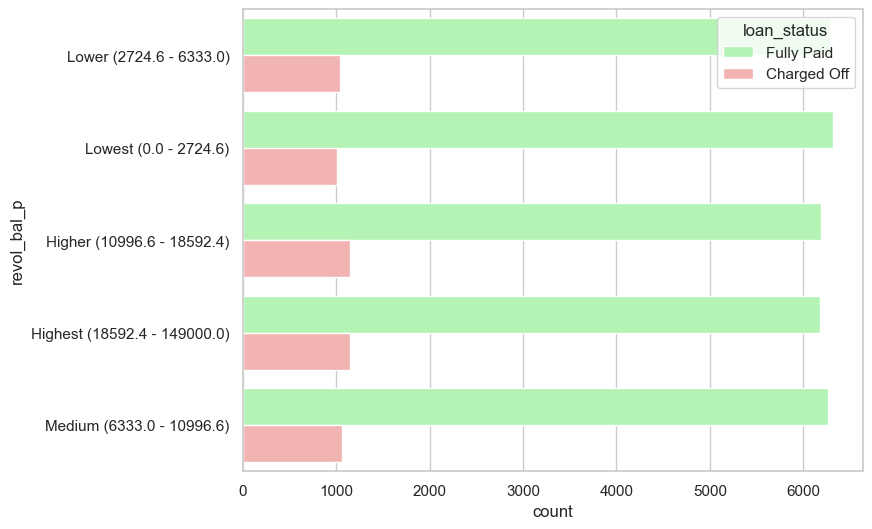

revol_bal_p,Charged off %,Record count
Highest (18592.4 - 149000.0),0.156732,7331
Higher (10996.6 - 18592.4),0.156322,7331
Medium (6333.0 - 10996.6),0.145313,7329
Lower (2724.6 - 6333.0),0.142390,7332
Lowest (0.0 - 2724.6),0.138317,7331


In [134]:
PercentileCut(column='revol_bal')
Univariate_Categorical(column='revol_bal_p')

In [135]:
#Higher the revolving balance, bigger the chance of the loan getting defaulted.

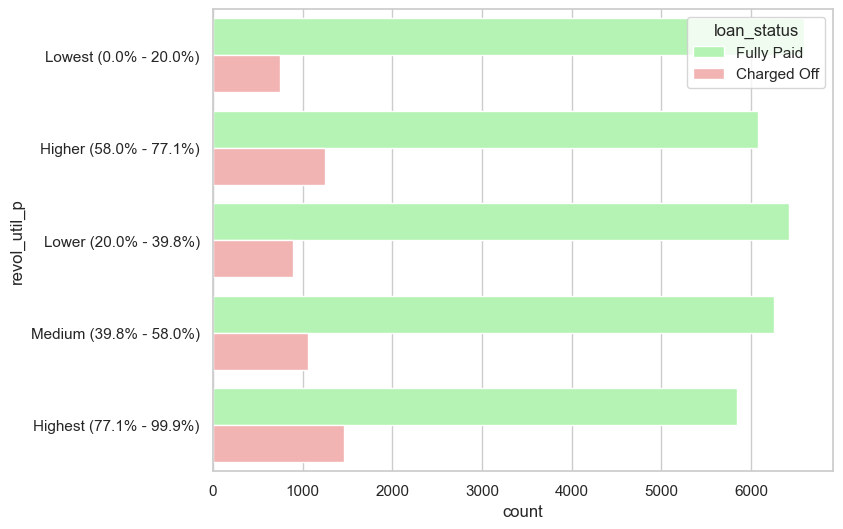

revol_util_p,Charged off %,Record count
Highest (77.1% - 99.9%),0.199398,7307
Higher (58.0% - 77.1%),0.170306,7328
Medium (39.8% - 58.0%),0.145082,7320
Lower (20.0% - 39.8%),0.121721,7320
Lowest (0.0% - 20.0%),0.101487,7331


In [136]:
PercentileCut(column='revol_util',trailer='%')
Univariate_Categorical(column='revol_util_p')

In [137]:
#revolving line utilization rate has a large impact to the default percentage. with increase of this, chances of default increases

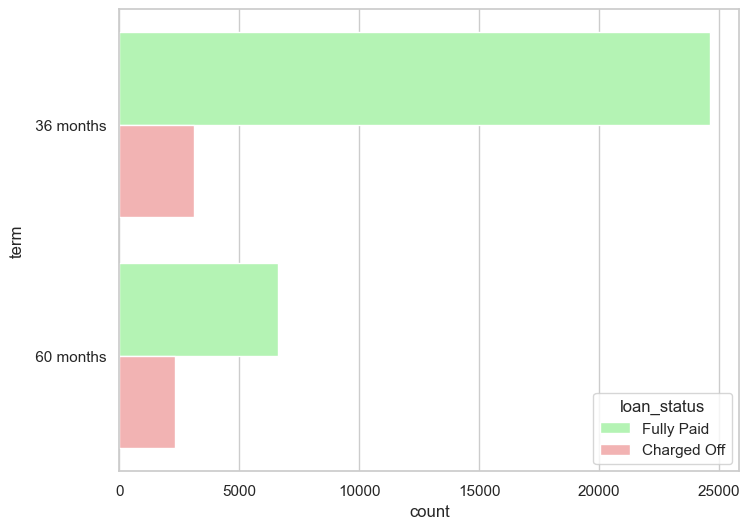

term,Charged off %,Record count
60 months,0.257920,8933
36 months,0.112334,27721


In [138]:
Univariate_Categorical(column='term')

In [139]:
#For loans with 5 year repayment term, the default percent is 25%. And for 3 year loan repayment term, the default is only for 11% of the cases.
#Therefore, loan repayment term plays a factor in judging the default rate.

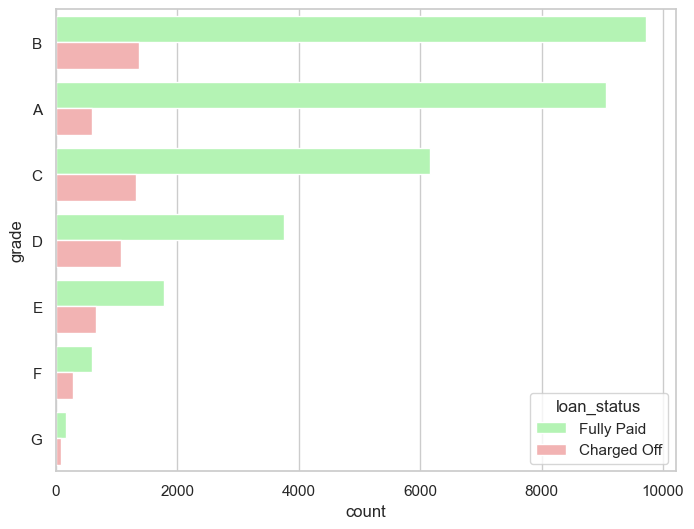

grade,Charged off %,Record count
G,0.363985,261
F,0.326185,886
E,0.269608,2448
D,0.223371,4835
C,0.177115,7481
B,0.123997,11097
A,0.061476,9646


In [140]:
Univariate_Categorical(column='grade')

In [141]:
#D, E, F and G have very high default rate.

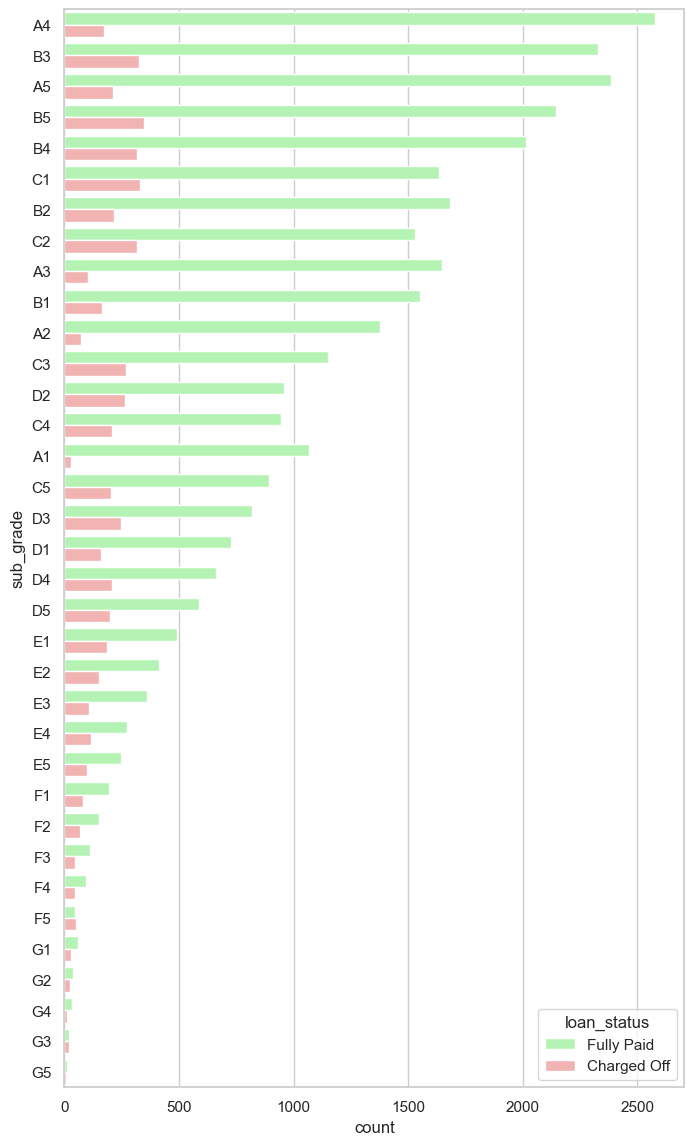

sub_grade,Charged off %,Record count
F5,0.510204,98
G3,0.475000,40
G5,0.409091,22
G2,0.393939,66
G1,0.340909,88
F4,0.330935,139
F2,0.308756,217
E4,0.298469,392
F3,0.294872,156
F1,0.289855,276


In [142]:
Univariate_Categorical(column='sub_grade', figsize=(8,14))

In [143]:
#The G3 and F5 sub categories have above 40% default rate. This field is a clear indicator of the default percent.

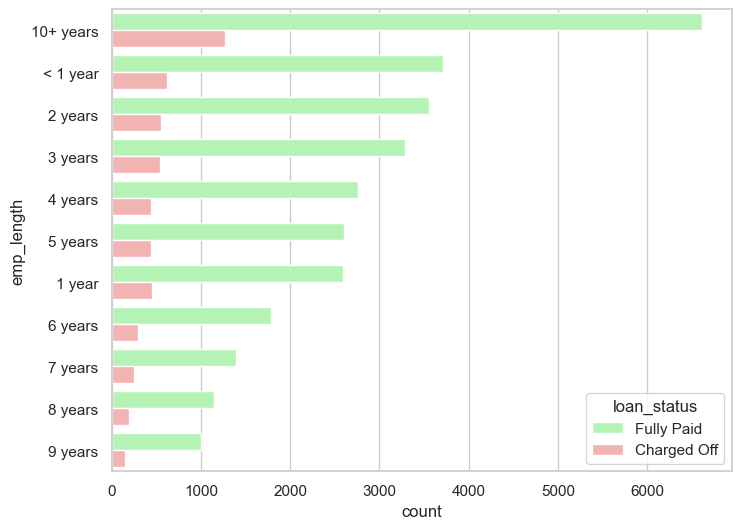

emp_length,Charged off %,Record count
10+ years,0.161004,7888
7 years,0.153285,1644
1 year,0.147552,3043
5 years,0.144875,3044
8 years,0.144453,1343
< 1 year,0.142593,4327
6 years,0.141823,2073
3 years,0.140167,3824
4 years,0.138437,3200
2 years,0.133382,4101


In [144]:
Univariate_Categorical(column='emp_length')

In [145]:
#+10 years of emp length has higher tendency to default.

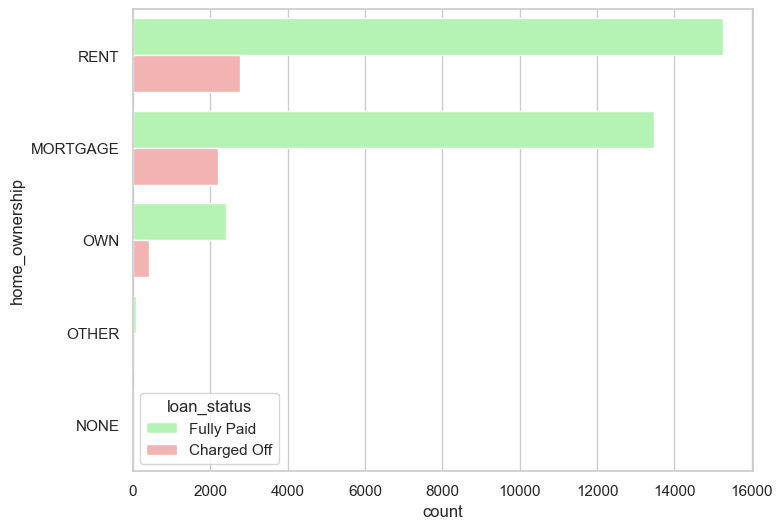

home_ownership,Charged off %,Record count
OTHER,0.182796,93
RENT,0.153791,18031
OWN,0.152174,2852
MORTGAGE,0.139968,15675


In [146]:
Univariate_Categorical(column='home_ownership')

In [147]:
#not much to conclude

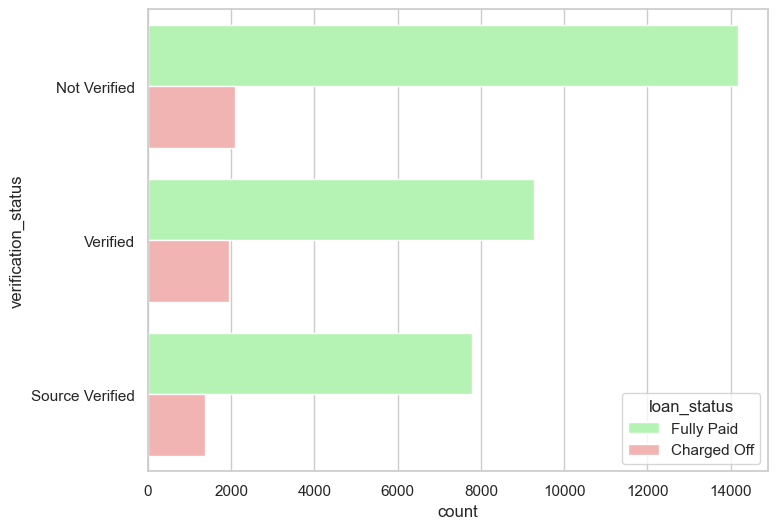

verification_status,Charged off %,Record count
Verified,0.173723,11219
Source Verified,0.149973,9155
Not Verified,0.128747,16280


In [148]:
Univariate_Categorical(column='verification_status')

In [149]:
#verified customers showing more defaults so verification has a flaw

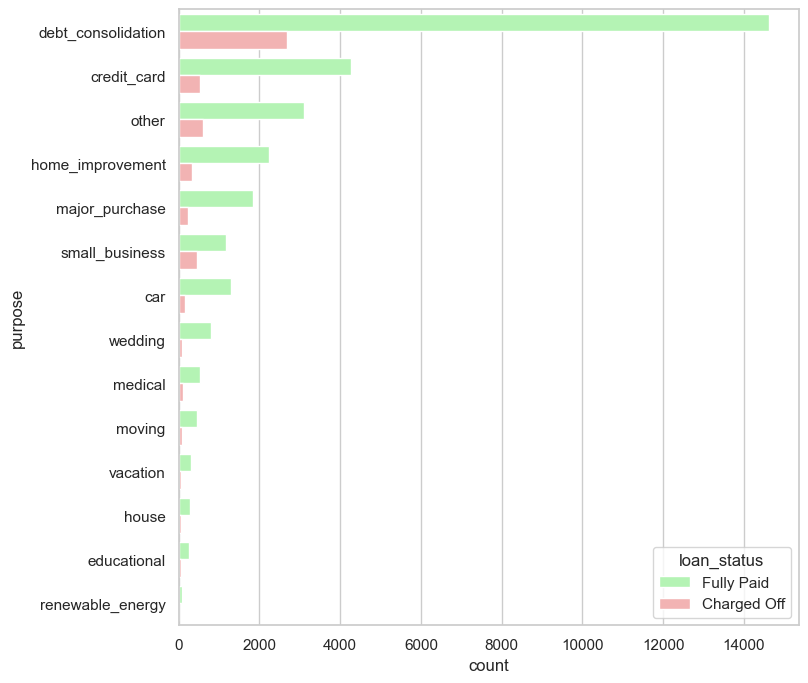

purpose,Charged off %,Record count
small_business,0.279729,1623
renewable_energy,0.189474,95
educational,0.173077,312
moving,0.163636,550
other,0.163558,3699
house,0.162722,338
medical,0.162246,641
debt_consolidation,0.154695,17305
vacation,0.142466,365
home_improvement,0.125978,2556


In [150]:
Univariate_Categorical(column='purpose', figsize=(8,8))

In [151]:
# small business purpose, Renewable and Education loan has maximum defaults.

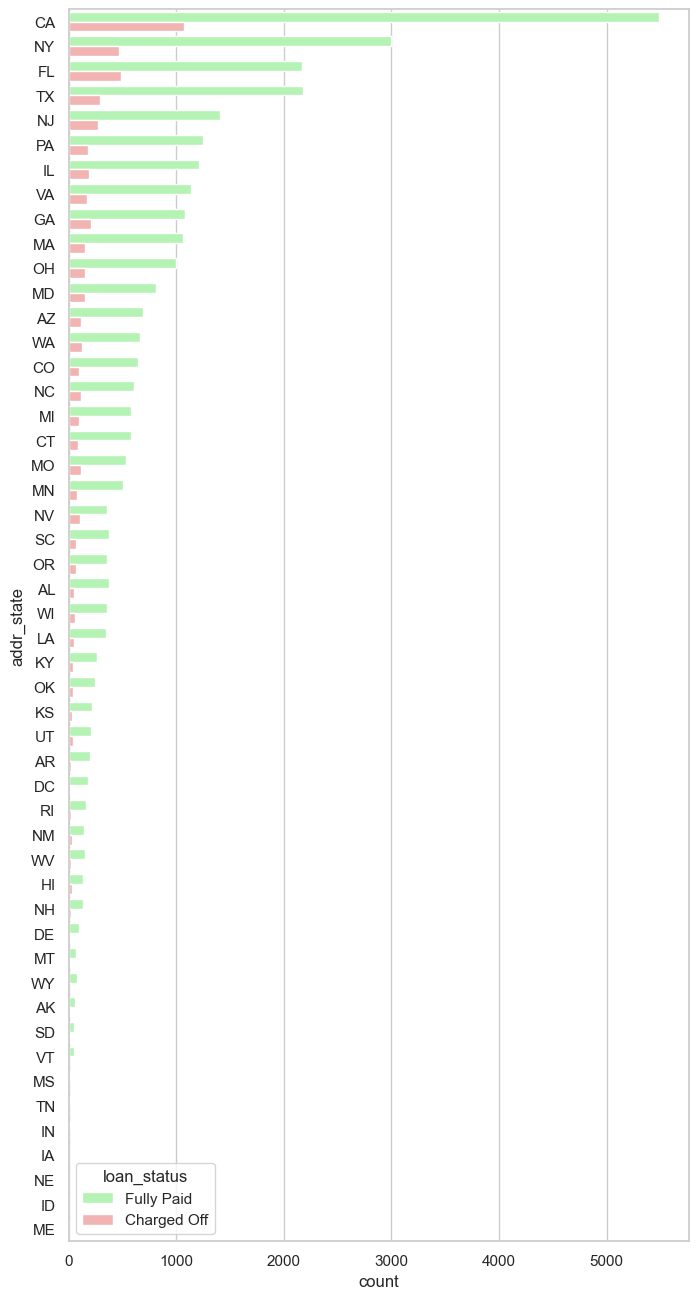

addr_state,Charged off %,Record count
NE,0.600000,5
NV,0.225383,457
ID,0.200000,5
SD,0.193548,62
AK,0.183099,71
FL,0.182881,2652
HI,0.175000,160
MO,0.171561,647
NM,0.169492,177
OR,0.163551,428


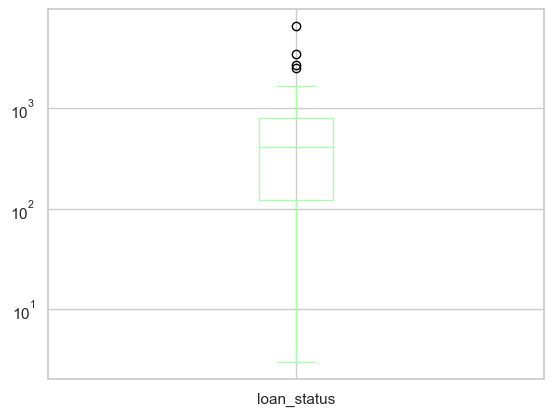

In [152]:
Univariate_Categorical(column='addr_state',figsize=(8,16), box_plot=True)

In [153]:
#From the above table we can see that the some of the risky states are NE, NV, SD, AK, FL, MO

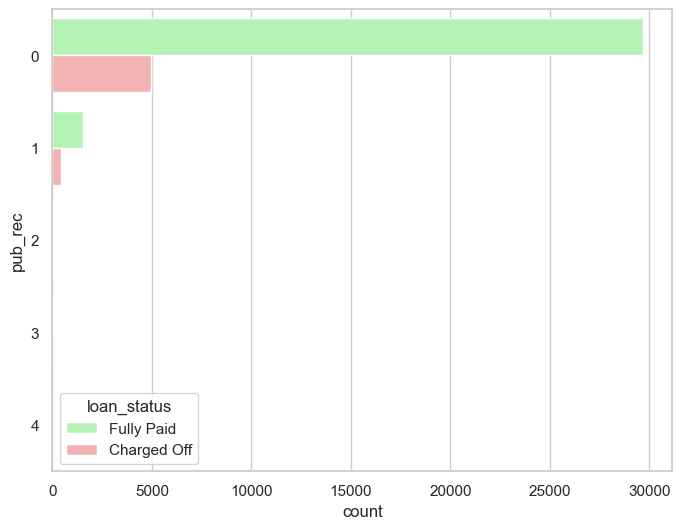

pub_rec,Charged off %,Record count
1,0.228499,1965
2,0.217391,46
0,0.143179,34635


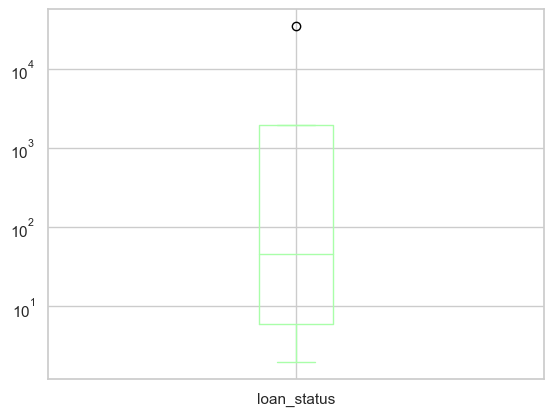

In [154]:
Univariate_Categorical(column='pub_rec', box_plot=True)

In [155]:
#Above data and graph crealy shows that individuals with non-zero derogatory public records have higher chances of charged off



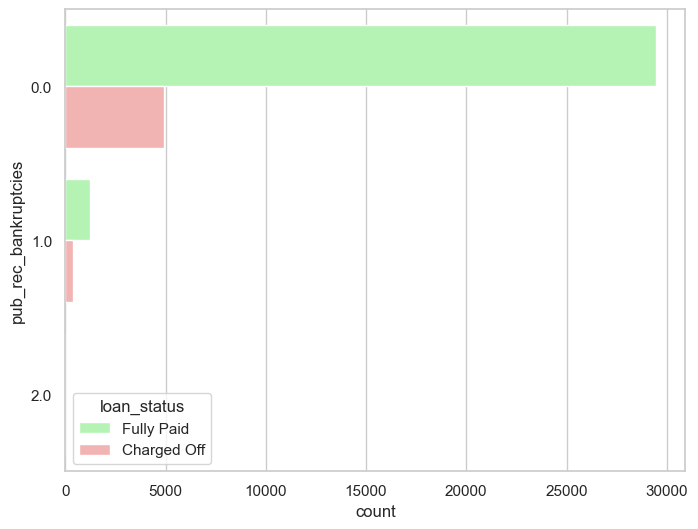

pub_rec_bankruptcies,Charged off %,Record count
2.0,0.400000,5
1.0,0.225766,1599
0.0,0.143725,34392


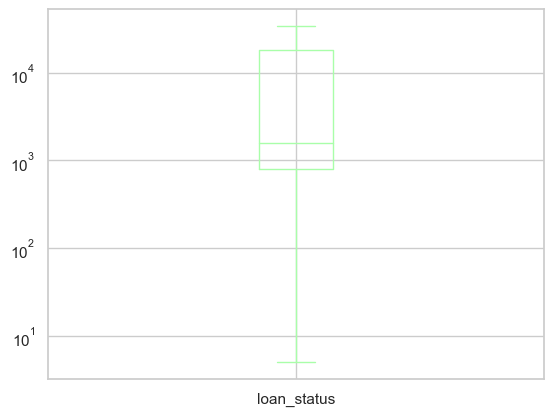

In [156]:
Univariate_Categorical(column='pub_rec_bankruptcies', box_plot=True)

In [157]:
#Higher the number of public bankruptcy records, bigger the chance of defaulting the loan.

In [159]:
#checking veriables together and see their combined effect in Bivariate analysis.

In [160]:
def Bivariate_Analysis (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a violin plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=by, split=True, figsize=figsize,
                   ax=ax, hue_order=order)
    if title is not None:
        plt.title(title)
    plt.show()

In [161]:
def Bivariate_Categorical (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

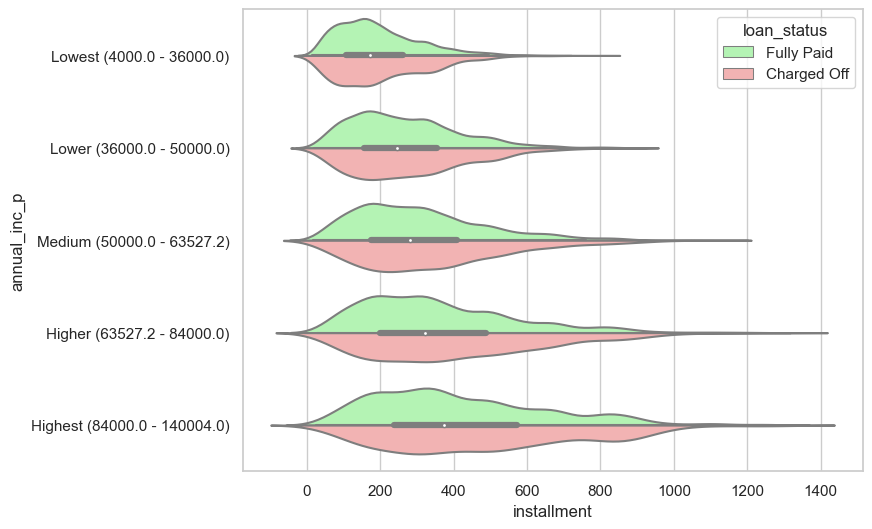

In [162]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()

In [163]:
#Above figure shows that for higher installments for any income group have more number of defaults.

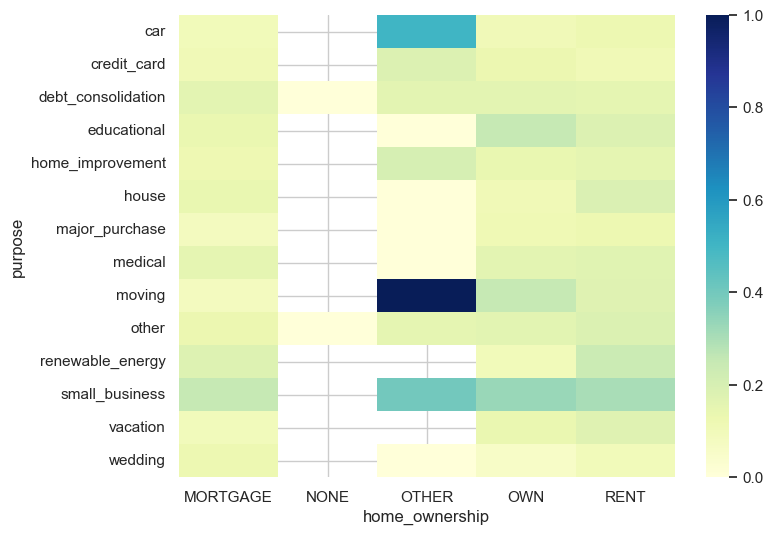

In [164]:
Bivariate_Categorical(x='home_ownership', y='purpose')

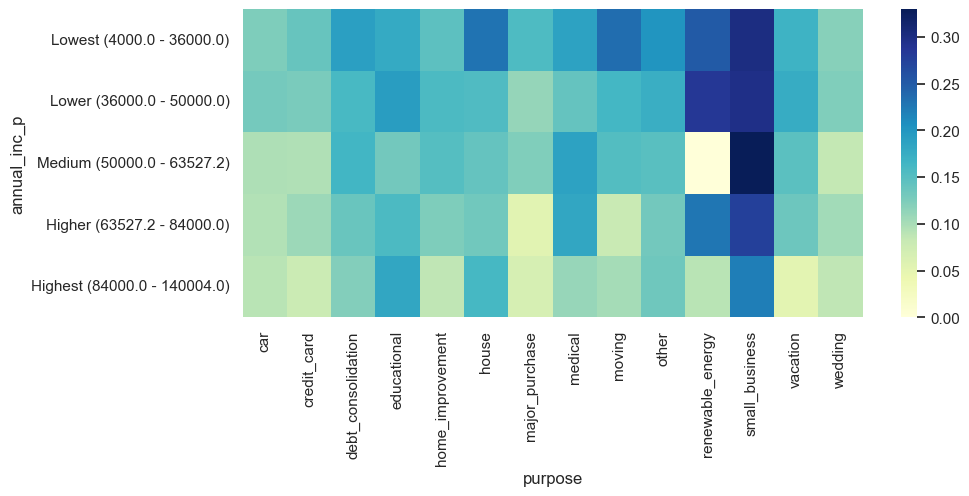

In [165]:
Bivariate_Categorical(x='purpose', y='annual_inc_p', figsize=(10,4))